## Assignment 12 - Naive Bayes

In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
train_data=pd.read_csv('SalaryData_Train (1).csv')

In [75]:
test_data= pd.read_csv('SalaryData_Test (1).csv')

In [76]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [78]:
del train_data['education']

In [79]:
del train_data['relationship']

In [80]:
 #labelencoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['workclass']= label_encoder.fit_transform(train_data['workclass'])
train_data['maritalstatus']=label_encoder.fit_transform(train_data['maritalstatus'])
train_data['race']= label_encoder.fit_transform(train_data['race'])
train_data['occupation']= label_encoder.fit_transform(train_data['occupation'])
train_data['sex']= label_encoder.fit_transform(train_data['sex'])
train_data['native']= label_encoder.fit_transform(train_data['native'])


In [81]:
train_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,4,1,2174,0,40,37,<=50K
1,50,4,13,2,3,4,1,0,0,13,37,<=50K
2,38,2,9,0,5,4,1,0,0,40,37,<=50K
3,53,2,7,2,5,2,1,0,0,40,37,<=50K
4,28,2,13,2,9,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37,<=50K
30157,40,2,9,2,6,4,1,0,0,40,37,>50K
30158,58,2,9,6,0,4,0,0,0,40,37,<=50K
30159,22,2,9,4,0,4,1,0,0,20,37,<=50K


In [82]:
train_data.shape

(30161, 12)

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int32 
 2   educationno    30161 non-null  int64 
 3   maritalstatus  30161 non-null  int32 
 4   occupation     30161 non-null  int32 
 5   race           30161 non-null  int32 
 6   sex            30161 non-null  int32 
 7   capitalgain    30161 non-null  int64 
 8   capitalloss    30161 non-null  int64 
 9   hoursperweek   30161 non-null  int64 
 10  native         30161 non-null  int32 
 11  Salary         30161 non-null  object
dtypes: int32(6), int64(5), object(1)
memory usage: 2.1+ MB


In [84]:
train_data.describe()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.121316,2.580087,5.959849,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,2.550037,1.498018,4.029633,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,10.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,13.000000,4.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,16.000000,6.000000,13.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


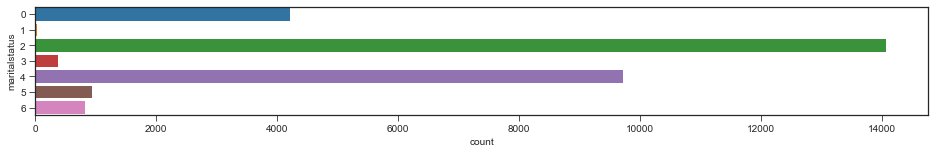

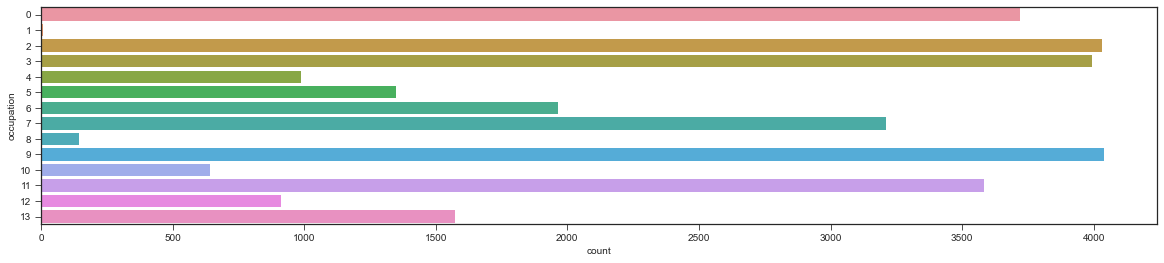

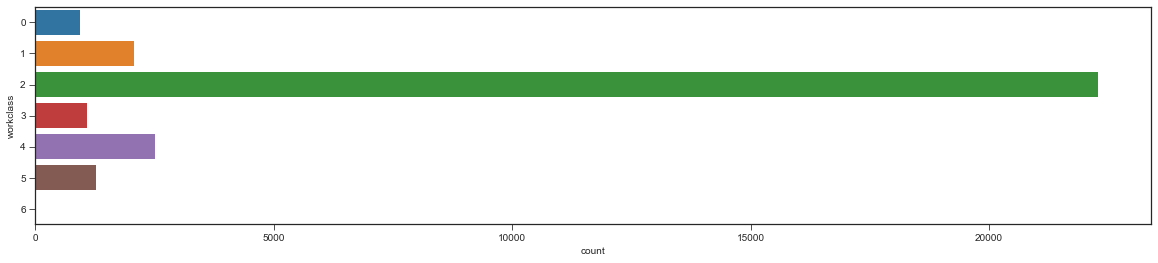

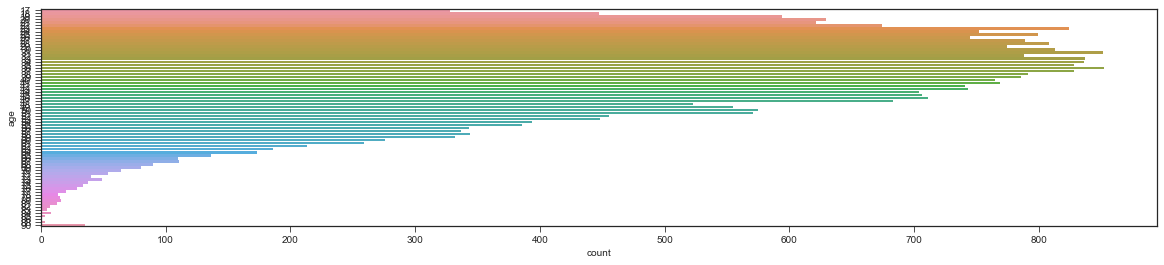

In [85]:
import seaborn as sns
fig = plt.figure(figsize=(16,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=train_data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=train_data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=train_data)

fig = plt.figure(figsize=(20,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="age", data=train_data)
plt.style.use('seaborn-ticks')


<AxesSubplot:xlabel='race', ylabel='count'>

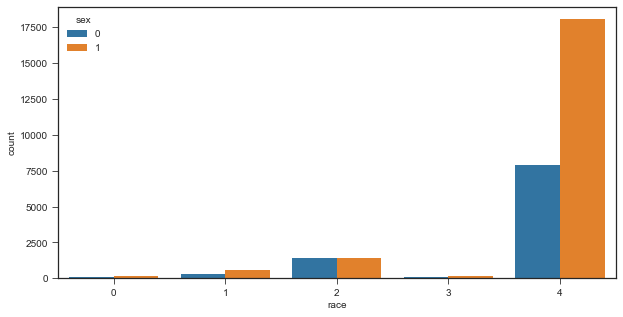

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x='race',hue='sex', data=train_data)

In [87]:
train_data.corr()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,0.043525,-0.276363,-0.005682,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.037833,-0.034235,0.015572,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
educationno,0.043525,0.037833,1.000000,-0.063419,0.087717,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.063419,1.000000,0.022655,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,0.087717,0.022655,1.000000,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
race,0.023380,0.044734,0.032805,-0.068641,0.000717,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,0.006155,-0.119774,0.062316,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.124416,-0.042414,0.022162,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513
capitalloss,0.060278,0.007244,0.079691,-0.035385,0.014612,0.023461,0.047285,-0.032218,1.000000,0.052454,0.010193
hoursperweek,0.101598,0.050723,0.152522,-0.189004,0.018365,0.048533,0.231272,0.080431,0.052454,1.000000,0.008429


<AxesSubplot:>

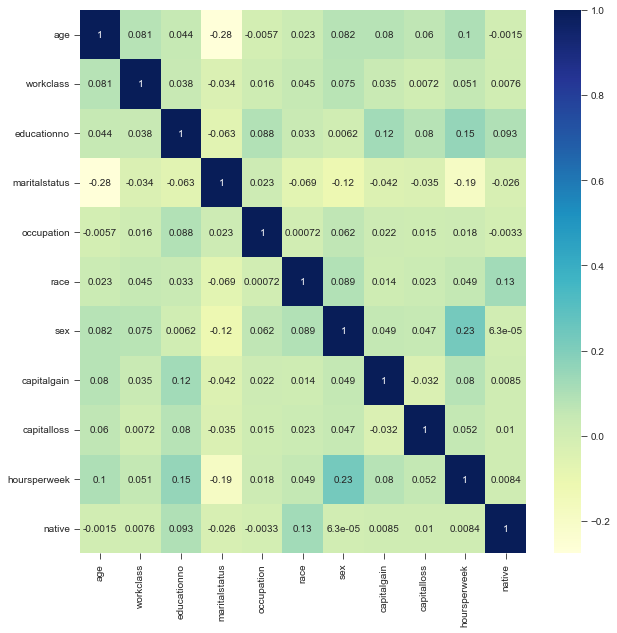

In [88]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

## Model biulding

In [89]:
x1_train=train_data.iloc[:,0:-1]
y1_train=train_data.iloc[:,-1]

In [90]:
x1.head()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,4,1,2174,0,40,37
1,50,4,13,2,3,4,1,0,0,13,37
2,38,2,9,0,5,4,1,0,0,40,37
3,53,2,7,2,5,2,1,0,0,40,37
4,28,2,13,2,9,2,0,0,0,40,4


In [91]:
y1.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [92]:
train_data.shape

(30161, 12)

In [94]:
 #train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()

In [95]:
# fit the model
gnb.fit(x1_train, y1_train)

GaussianNB()

In [96]:
y_pred_train = gnb.predict(x1_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [97]:
from sklearn.metrics import accuracy_score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y1_train, y_pred_train)))

Training-set accuracy score: 0.7918


In [98]:
# check class distribution in test set

y1_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

## Test data

In [100]:
x2_test=test_data.iloc[:,0:-1]
y2_test=test_data.iloc[:,-1]

In [102]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_data['workclass']= label_encoder.fit_transform(test_data['workclass'])
test_data['maritalstatus']=label_encoder.fit_transform(test_data['maritalstatus'])
test_data['race']= label_encoder.fit_transform(test_data['race'])
test_data['occupation']= label_encoder.fit_transform(test_data['occupation'])
test_data['sex']= label_encoder.fit_transform(test_data['sex'])
test_data['native']= label_encoder.fit_transform(test_data['native'])


In [59]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,Own-child,2,1,0,0,40,37,<=50K
1,38,2,HS-grad,9,2,4,Husband,4,1,0,0,50,37,<=50K
2,28,1,Assoc-acdm,12,2,10,Husband,4,1,0,0,40,37,>50K
3,44,2,Some-college,10,2,6,Husband,2,1,7688,0,40,37,>50K
4,34,2,10th,6,4,7,Not-in-family,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,Bachelors,13,4,9,Own-child,4,1,0,0,40,37,<=50K
15056,39,2,Bachelors,13,0,9,Not-in-family,4,0,0,0,36,37,<=50K
15057,38,2,Bachelors,13,2,9,Husband,4,1,0,0,50,37,<=50K
15058,44,2,Bachelors,13,0,0,Own-child,1,1,5455,0,40,37,<=50K


In [103]:
del test_data['education']

In [104]:
del test_data['relationship']

In [105]:
x2_test=test_data.iloc[:,0:-1]
y2_test=test_data.iloc[:,-1]

In [107]:
x2_test.head()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,7,4,6,2,1,0,0,40,37
1,38,2,9,2,4,4,1,0,0,50,37
2,28,1,12,2,10,4,1,0,0,40,37
3,44,2,10,2,6,2,1,7688,0,40,37
4,34,2,6,4,7,4,1,0,0,30,37


In [108]:
y2_test.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: Salary, dtype: object

In [112]:
y2_pred_test = gnb.predict(x2_test)

y2_pred_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [115]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y2_pred_test)))

Training-set accuracy score: 0.7919


In [110]:
# check class distribution in test set
y2_test.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [120]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y2_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10778   582]
 [ 2552  1148]]

True Positives(TP) =  10778

True Negatives(TN) =  1148

False Positives(FP) =  582

False Negatives(FN) =  2552


<AxesSubplot:>

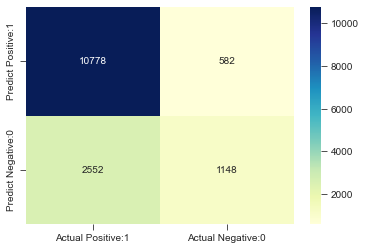

In [121]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_pred_test))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.66      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



In [123]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [124]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7919
